In [ ]:
import pandas as pd
df = pd.read_excel('walmart Retail Data.xlsx')
print(df.head())


         City  Customer Age      Customer Name Customer Segment  Discount  \
0  McKeesport           NaN     Jessica Myrick   Small Business      0.10   
1       Bowie           NaN     Matt Collister      Home Office      0.08   
2        Napa           NaN  Alan Schoenberger        Corporate      0.00   
3  Montebello           NaN  Elizabeth Moffitt         Consumer      0.08   
4        Napa           NaN  Alan Schoenberger        Corporate      0.07   

   Number of Records Order Date  Order ID Order Priority  Order Quantity  ...  \
0                  1 2012-01-01     28774           High              32  ...   
1                  1 2012-01-01     13729  Not Specified               9  ...   
2                  1 2012-01-02     37537            Low               4  ...   
3                  1 2012-01-02     44069       Critical              43  ...   
4                  1 2012-01-02     37537            Low              43  ...   

    Profit Region Row ID    Sales  Ship Date      

In [ ]:
from statsmodels.tsa.arima.model import ARIMA


In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])  # Convert to datetime


df.set_index('Order Date', inplace=True)


sales = df['Sales']

print(sales.head())


Order Date
2012-01-01     180.36
2012-01-01     872.48
2012-01-02    1239.06
2012-01-02     614.80
2012-01-02    4083.19
Name: Sales, dtype: float64


In [ ]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

df.set_index('Ship Date', inplace=True)


sales = df['Sales']

print(sales.head())

Ship Date
2012-01-02     180.36
2012-01-03     872.48
2012-01-02    1239.06
2012-01-02     614.80
2012-01-04    4083.19
Name: Sales, dtype: float64


In [ ]:
print(df.columns)


Index(['City', 'Customer Age', 'Customer Name', 'Customer Segment', 'Discount',
       'Number of Records', 'Order ID', 'Order Priority', 'Order Quantity',
       'Product Base Margin', 'Product Category', 'Product Container',
       'Product Name', 'Product Sub-Category', 'Profit', 'Region', 'Row ID',
       'Sales', 'Ship Mode', 'Shipping Cost', 'State', 'Unit Price',
       'Zip Code'],
      dtype='object')


In [ ]:
model = ARIMA(sales, order=(5, 1, 0))
results = model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

In [ ]:
forecast = results.forecast(steps=12)
print(forecast)


8399    474.208255
8400    443.951745
8401    440.334981
8402    477.173518
8403    549.671268
8404    510.571944
8405    483.769397
8406    483.783013
8407    490.506972
8408    499.388452
8409    502.800321
8410    495.322445
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
increase_rate = 0.1
adjusted_forecast = forecast * (1 + increase_rate)
print(adjusted_forecast)


8399    521.629080
8400    488.346919
8401    484.368479
8402    524.890869
8403    604.638394
8404    561.629139
8405    532.146336
8406    532.161314
8407    539.557669
8408    549.327298
8409    553.080353
8410    544.854689
Name: predicted_mean, dtype: float64


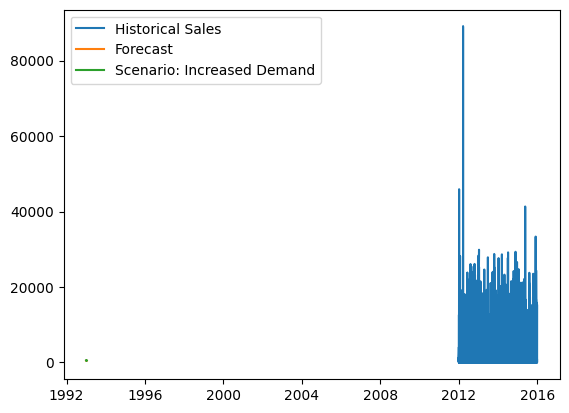

In [ ]:
import matplotlib.pyplot as plt

plt.plot(sales, label="Historical Sales")
plt.plot(forecast, label="Forecast")
plt.plot(adjusted_forecast, label="Scenario: Increased Demand")
plt.legend()
plt.show()

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import plotly.graph_objects as go
from ipywidgets import widgets
from IPython.display import display

In [ ]:
historical_trend = np.polyfit(range(len(sales)), sales, 1)
historical_trend_line = np.polyval(historical_trend, range(len(sales)))

In [ ]:
def plot_forecast(increase_rate):
    adjusted_forecast = forecast * (1 + increase_rate)

In [ ]:
 fig = go.Figure()

In [ ]:
fig.add_trace(go.Scatter(x=sales.index, y=sales, mode='lines', name='Historical Sales'))

In [ ]:
    fig.add_trace(go.Scatter(x=sales.index, y=historical_trend_line, mode='lines', name='Trend Line'))

In [ ]:
forecast_index = pd.date_range(start=sales.index[-1], periods=12, freq='M')
fig.add_trace(go.Scatter(x=forecast_index, y=forecast, mode='lines', name='Forecast'))


<ipython-input-17-45ccd4e15dc4>:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [ ]:
 fig.add_trace(go.Scatter(x=forecast_index, y=adjusted_forecast, mode='lines', name='Adjusted Forecast'))

In [ ]:
 fig.update_layout(
        title="Sales Forecast with Parameter-Based Scenarios",
        xaxis_title="Date",
        yaxis_title="Sales",
        legend_title="Legend",
    )

    # Show plot
fig.show()

In [ ]:
slider = widgets.FloatSlider(
    value=0.1,
    min=0,
    max=0.5,
    step=0.01,
    description="Increase Rate"
)

In [ ]:
def update_plot(change):
    plot_forecast(slider.value)

slider.observe(update_plot, names='value')

# Display the slider
display(slider)

# Initial plot
plot_forecast(slider.value)

FloatSlider(value=0.1, description='Increase Rate', max=0.5, step=0.01)

In [ ]:
print("Increase Rate:", slider.value)


Increase Rate: 0.1


In [ ]:
fig.add_trace(go.Scatter(x=forecast_index, y=adjusted_forecast, mode='lines', name='Adjusted Forecast'))

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()


In [ ]:
import numpy as np
from scipy import stats

def check_stationarity(series, n, alpha=0.05):
    partitions = np.array_split(series, n)
    for i, part in enumerate(partitions):
        print(f'Partition {i+1}: mean={part.mean()}, variance={part.var()}')

    f_val, p_val = stats.f_oneway(*partitions)
    print(f'F-value: {f_val}, p-value: {p_val}')

    if p_val <= alpha:
        print('Partitions are significantly different --> Non-Stationary')
    else:
        print('Partitions are not significantly different --> Stationary')


np.random.seed(0)
y_stationary = np.random.randn(100)
y_non_stationary = np.cumsum(np.random.randn(100))


print('Stationary data')
check_stationarity(y_stationary, n=5)

print('Non-stationary data')
check_stationarity(y_non_stationary, n=5)

Stationary data
Partition 1: mean=0.5693345929456347, variance=0.7228107940950779
Partition 2: mean=0.055750353486713256, variance=1.4109179363168722
Partition 3: mean=-0.39508305976855773, variance=0.7703520510999329
Partition 4: mean=-0.35217102320782995, variance=0.5414209132188481
Partition 5: mean=0.42120921421646457, variance=0.8667341584721395
F-value: 4.223750772972402, p-value: 0.003433147872491416
Partitions are significantly different --> Non-Stationary
Non-stationary data
Partition 1: mean=4.054679168490303, variance=12.905639595449898
Partition 2: mean=11.16394691353869, variance=1.032040461360873
Partition 3: mean=12.478090800258052, variance=2.065156370981873
Partition 4: mean=11.969925351790375, variance=0.9826169400757216
Partition 5: mean=5.368633080053631, variance=4.742892895090007
F-value: 69.1272842637174, p-value: 2.6845247109872215e-27
Partitions are significantly different --> Non-Stationary


In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

df = pd.read_excel('walmart Retail Data.xlsx')

time_series = df['Sales']

adf_result = adfuller(time_series)
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

ADF Statistic: -88.37214147310654
p-value: 0.0


In [ ]:
import pandas as pd
import plotly.graph_objects as go


df = pd.read_excel("walmart Retail Data.xlsx")
df['Order Date'] = pd.to_datetime(df['Order Date'])

start_date = '2014-01-01'
end_date = '2014-12-31'
filtered_df = df[(df['Order Date'] >= start_date) & (df['Order Date'] <= end_date)]


filtered_df['Month'] = filtered_df['Order Date'].dt.to_period('M')



forecast_index = pd.date_range(start=filtered_df['Order Date'].max(), periods=12, freq='M')


forecast_df = pd.DataFrame({'Month': forecast_index.to_period('M'),
                            'Forecast': forecast, # Make sure 'forecast' is defined
                            'Adjusted_Forecast': adjusted_forecast}) # Make sure 'adjusted_forecast' is defined


monthly_data = pd.merge(filtered_df, forecast_df, on='Month', how='left')


monthly_data = monthly_data.groupby('Month').agg({
    'Sales': 'sum',
    'Forecast': 'sum',
    'Adjusted_Forecast': 'sum'
}).reset_index()


fig = go.Figure()


fig.add_trace(go.Scatter(x=monthly_data['Month'].astype(str),
                         y=monthly_data['Sales'],
                         mode='lines+markers',
                         name='Historical Sales'))


fig.add_trace(go.Scatter(x=monthly_data['Month'].astype(str),
                         y=monthly_data['Forecast'],
                         mode='lines',
                         name='Forecast'))


fig.add_trace(go.Scatter(x=monthly_data['Month'].astype(str),
                         y=monthly_data['Adjusted_Forecast'],
                         mode='lines',
                         name='Adjusted Forecast'))


fig.update_layout(
    title='Simplified Sales Forecast (2014)',
    xaxis_title='Date (Month)',
    yaxis_title='Sales',
    legend_title='Legend',
    template='plotly_white'
)

fig.show()

<ipython-input-27-cb2ae15cbd74>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-27-cb2ae15cbd74>:17: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [ ]:
!pip install openpyxl
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Load your Walmart retail data into a pandas DataFrame
# Assuming your data has columns like 'ds' (date) and 'y' (sales)
# Use read_excel with the correct file extension and engine
df = pd.read_excel('walmart Retail Data.xlsx', engine='openpyxl')

# Rename columns to 'ds' and 'y' if necessary
df = df.rename(columns={'Order Date': 'ds', 'Sales': 'y'})

# Create and fit the Prophet model
model = Prophet()
model.fit(df)

# Make future predictions
future = model.make_future_dataframe(periods=365)  # Predict for the next year
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1edor1tv/q84h4ykr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1edor1tv/bc5w9ca7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87904', 'data', 'file=/tmp/tmp1edor1tv/q84h4ykr.json', 'init=/tmp/tmp1edor1tv/bc5w9ca7.json', 'output', 'file=/tmp/tmp1edor1tv/prophet_modellp4tcctz/prophet_model-20250115113136.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:31:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:31:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


df = pd.read_excel("walmart Retail Data.xlsx", engine="openpyxl") # Use read_excel for xlsx files

# Now proceed with the rest of your code... # or 'cp1252' or another relevant encoding
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Feature Engineering
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day
df['Weekday'] = df['Order Date'].dt.weekday



# One-Hot Encode Categorical Columns (e.g., Category)
df = pd.get_dummies(df, columns=['Product Category'], drop_first=True)

# Define features and target
X = df[['Year', 'Month', 'Day', 'Weekday', 'Discount'] + [col for col in df.columns if 'Category_' in col]]
y = df['Sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Calculate MSE
rmse = np.sqrt(mse)                     # Calculate RMSE manually

print(f"RMSE: {rmse}")


RMSE: 3532.42211187249


<ipython-input-29-8d05f42cd9f3>:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-29-8d05f42cd9f3>:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-29-8d05f42cd9f3>:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-29-8d05

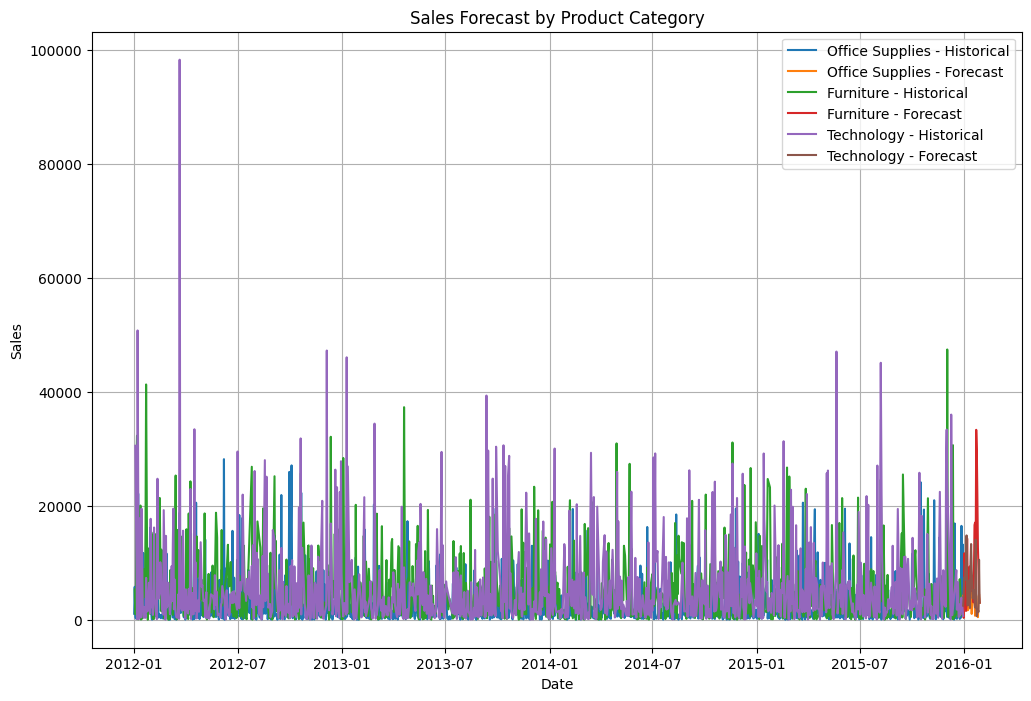

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


df = pd.read_excel("walmart Retail Data.xlsx", engine="openpyxl")
df['Order Date'] = pd.to_datetime(df['Order Date'])


category_sales = df.groupby(['Order Date', 'Product Category']).agg({'Sales': 'sum'}).reset_index()

categories = category_sales['Product Category'].unique()
forecast_results = {}

for category in categories:

    category_data = category_sales[category_sales['Product Category'] == category]

    category_data['Year'] = category_data['Order Date'].dt.year
    category_data['Month'] = category_data['Order Date'].dt.month
    category_data['Day'] = category_data['Order Date'].dt.day
    category_data['Weekday'] = category_data['Order Date'].dt.weekday

    X = category_data[['Year', 'Month', 'Day', 'Weekday']]
    y = category_data['Sales']


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)


    future_dates = pd.date_range(category_data['Order Date'].max(), periods=30)
    future_features = pd.DataFrame({
        'Year': future_dates.year,
        'Month': future_dates.month,
        'Day': future_dates.day,
        'Weekday': future_dates.weekday
    })
    future_forecast = model.predict(future_features)


    forecast_results[category] = {
        'historical': category_data,
        'forecast': pd.DataFrame({'Date': future_dates, 'Forecast': future_forecast})
    }


plt.figure(figsize=(12, 8))
for category, results in forecast_results.items():
    plt.plot(results['historical']['Order Date'], results['historical']['Sales'], label=f"{category} - Historical")
    plt.plot(results['forecast']['Date'], results['forecast']['Forecast'], label=f"{category} - Forecast")

plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Forecast by Product Category")
plt.legend()
plt.grid()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


df = pd.read_excel("walmart Retail Data.xlsx", engine="openpyxl")
df['Order Date'] = pd.to_datetime(df['Order Date'])

df = df[df['Order Date'].dt.year == 2014]

category_sales = df.groupby(['Order Date', 'Product Category']).agg({'Sales': 'sum'}).reset_index()

categories = category_sales['Product Category'].unique()
forecast_results = {}

for category in categories:

    category_data = category_sales[category_sales['Product Category'] == category]


    category_data['Year'] = category_data['Order Date'].dt.year
    category_data['Month'] = category_data['Order Date'].dt.month
    category_data['Day'] = category_data['Order Date'].dt.day
    category_data['Weekday'] = category_data['Order Date'].dt.weekday


    X = category_data[['Year', 'Month', 'Day', 'Weekday']]
    y = category_data['Sales']


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    future_dates = pd.date_range(category_data['Order Date'].max(), periods=30)
    future_features = pd.DataFrame({
        'Year': future_dates.year,
        'Month': future_dates.month,
        'Day': future_dates.day,
        'Weekday': future_dates.weekday
    })
    future_forecast = model.predict(future_features)


    forecast_results[category] = {
        'historical': category_data,
        'forecast': pd.DataFrame({'Date': future_dates, 'Forecast': future_forecast})
    }

plt.figure(figsize=(12, 8))
for category, results in forecast_results.items():
    plt.plot(results['historical']['Order Date'], results['historical']['Sales'], label=f"{category} - Historical")
    plt.plot(results['forecast']['Date'], results['forecast']['Forecast'], label=f"{category} - Forecast")

plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Forecast by Product Category (2014)")
plt.legend()
plt.grid()
plt.show()


<ipython-input-30-3d3d508e3ac2>:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-30-3d3d508e3ac2>:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-30-3d3d508e3ac2>:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-30-3d3d

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_excel("walmart Retail Data.xlsx", engine="openpyxl")
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Filter data for 2014 and "Office Supplies" category
df = df[(df['Order Date'].dt.year == 2014) & (df['Product Category'] == 'Office Supplies')]

# Aggregate data by Order Date
category_sales = df.groupby(['Order Date']).agg({'Sales': 'sum'}).reset_index()

# Feature Engineering
category_sales['Year'] = category_sales['Order Date'].dt.year
category_sales['Month'] = category_sales['Order Date'].dt.month
category_sales['Day'] = category_sales['Order Date'].dt.day
category_sales['Weekday'] = category_sales['Order Date'].dt.weekday

# Define features and target
X = category_sales[['Year', 'Month', 'Day', 'Weekday']]
y = category_sales['Sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Forecast for future dates (example: next 30 days)
future_dates = pd.date_range(category_sales['Order Date'].max(), periods=30)
future_features = pd.DataFrame({
    'Year': future_dates.year,
    'Month': future_dates.month,
    'Day': future_dates.day,
    'Weekday': future_dates.weekday
})
future_forecast = model.predict(future_features)



# Plot historical and forecast sales
plt.figure(figsize=(12, 8))

# Plot historical sales
plt.plot(category_sales['Order Date'], category_sales['Sales'], label="Office Supplies - Historical", color='blue')

# Plot forecast sales
plt.plot(future_dates, future_forecast, label="Office Supplies - Forecast", color='orange')

plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Forecast for Office Supplies (2014)")
plt.legend()
plt.grid()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd  # Import pandas for data manipulation




# Assuming 'category_sales' is your DataFrame with historical sales
Order_dates = category_sales['Order Date']
actual_sales = category_sales['Sales']
forecasted_sales = future_forecast  # Assuming 'future_forecast' is your forecast data

plt.figure(figsize=(12, 6))

plt.plot(Order_dates, actual_sales, color='blue', label='Historical Sales')
plt.plot(future_dates, forecasted_sales, color='orange', linestyle='dashed', label='Forecast')  # Use future_dates here

plt.fill_between(future_dates, actual_sales[-len(future_dates):], forecasted_sales, alpha=0.2, color='orange')  # Adjust fill_between

plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Forecast for Office Supplies (2014)")
plt.legend()
plt.grid(True)

# Annotate with key metrics (example)
plt.text(0.8, 0.9, f"RMSE: {rmse:.2f}", transform=plt.gca().transAxes)

plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error


In [ ]:
# Load the dataset
df = pd.read_excel("walmart12.xlsx")

# Display the first few rows
print("Initial Dataset:")
print(df.head())


In [ ]:
# Extract 'Order Date' and 'Sales' columns
df = df[['Order Date', 'Sales']]

# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Sort by date to ensure chronological order
df = df.sort_values(by='Order Date')

# Set 'Order Date' as the index
df.set_index('Order Date', inplace=True)

print("\nProcessed Data:")
print(df.head())


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Fill or drop missing values if any
df['Sales'].fillna(df['Sales'].mean(), inplace=True)


In [ ]:
# Plot the sales data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales'], label='Sales', color='blue')
plt.title('Historical Sales Data')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Augmented Dickey-Fuller (ADF) Test
adf_result = adfuller(df['Sales'])
print("\nADF Test Results:")
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

# Check stationarity
if adf_result[1] > 0.05:
    print("Data is non-stationary. Differencing is required.")
else:
    print("Data is stationary.")


In [ ]:
# Split data into training and testing sets
train_size = int(len(df) * 0.8)
train = df.iloc[:train_size]
test = df.iloc[train_size:]

print("\nTraining Data:")
print(train.tail())

print("\nTesting Data:")
print(test.head())


In [ ]:
# Define the SARIMA model
model = SARIMAX(train['Sales'],
                order=(1, 1, 1), # (p, d, q) - Adjust these parameters based on data
                seasonal_order=(1, 1, 1, 12)) # (P, D, Q, S) for seasonality

results = model.fit()

# Print summary of the model
print("\nSARIMA Model Summary:")
print(results.summary())


In [ ]:
# Forecast for the test period
forecast = results.get_forecast(steps=len(test))
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Evaluate forecast accuracy
rmse = np.sqrt(mean_squared_error(test['Sales'], forecast_values))
print(f"\nRoot Mean Squared Error (RMSE): {rmse}")


In [ ]:
# Plot actual vs forecast
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Sales'], label='Train', color='blue')
plt.plot(test.index, test['Sales'], label='Test', color='green')
plt.plot(test.index, forecast_values, label='Forecast', color='orange')
plt.fill_between(test.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='gray', alpha=0.2)
plt.title('Actual vs Forecast Sales')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Future forecast beyond the test period
future_forecast = results.get_forecast(steps=12) # 12 months
future_forecast_values = future_forecast.predicted_mean
future_forecast_ci = future_forecast.conf_int()

# Plot future forecast
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales'], label='Historical Sales', color='blue')
future_dates = pd.date_range(start=df.index[-1], periods=12, freq='M')
plt.plot(future_dates, future_forecast_values, label='Future Forecast', color='orange')
plt.fill_between(future_dates, future_forecast_ci.iloc[:, 0], future_forecast_ci.iloc[:, 1], color='gray', alpha=0.2)
plt.title('Future Sales Forecast')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
df['Sales'].plot(title='Historical Sales Data')
plt.show()


In [ ]:
import pandas as pd
df = pd.read_excel('walmart12.xlsx')
print(df.head())

In [ ]:
import pandas as pd
import numpy as np


sales_data = df['Sales']


def calculate_z_scores(data):
    mean = data.mean()
    std_dev = data.std()
    return (data - mean) / std_dev

z_scores = calculate_z_scores(sales_data)


def detect_outliers(z_scores, threshold=1):
    return df[np.abs(z_scores) > threshold]


outliers = detect_outliers(z_scores)


print("Outliers detected:")
print(outliers)



In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Order Date'], sales_data, label='Sales Data', color='blue')
plt.scatter(outliers['Order Date'], outliers['Sales'], color='red', label='Outliers')
plt.title('Sales Data with Outliers Highlighted')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import pandas as pd
import numpy as np

sales_data = df['Sales']


def calculate_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return Q1, Q3, IQR

def remove_outliers(data, threshold=1.5):
    Q1, Q3, IQR = calculate_iqr(data)
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]


filtered_data = remove_outliers(sales_data)


print("Data after removing outliers:")
print(filtered_data)



In [ ]:
from sklearn.ensemble import IsolationForest
import pandas as pd
import matplotlib.pyplot as plt

sales_data = df['Sales']


model = IsolationForest(contamination=0.05)
outliers = model.fit_predict(df[['Sales']])

outliers_labels = pd.Series(outliers).replace({1: 'Normal', -1: 'Outlier'})


df['Outlier_Label'] = outliers_labels


outliers_data = df[df['Outlier_Label'] == 'Outlier']


print("Outliers detected:")
print(outliers_data)


plt.figure(figsize=(8, 6))

plt.scatter(df['Order Date'], df['Sales'], label='Normal', color='blue')

plt.scatter(outliers_data['Order Date'], outliers_data['Sales'], label='Outliers', color='red')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Data with Outliers")
plt.legend()
plt.show()





In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Experiment with different order values
for p in range(1, 4):
    for d in range(0, 2):
        for q in range(1, 4):
            model = ARIMA(df['Sales'], order=(p, d, q))
            results = model.fit()


In [ ]:
import pandas as pd
import plotly.graph_objects as go

df = pd.read_excel("walmart12.xlsx")
df['Order Date'] = pd.to_datetime(df['Order Date'])

start_date = '2014-01-01'
end_date = '2014-12-31'
filtered_df = df[(df['Order Date'] >= start_date) & (df['Order Date'] <= end_date)]

filtered_df['Month'] = filtered_df['Order Date'].dt.to_period('M')

forecast_index = pd.date_range(start=filtered_df['Order Date'].max(), periods=12, freq='M')

# Extract the correct number of forecast values
forecast_values = forecast.predicted_mean[-12:]  # Get the last 12 forecast values
adjusted_forecast_values = adjusted_forecast.values # Assuming 'adjusted_forecast' is your Series

forecast_df = pd.DataFrame({'Month': forecast_index.to_period('M'),
                            'Forecast': forecast_values,
                            'Adjusted_Forecast': adjusted_forecast_values})

monthly_data = pd.merge(filtered_df, forecast_df, on='Month', how='left')

monthly_data = monthly_data.groupby('Month').agg({
    'Sales': 'sum',
    'Forecast': 'sum',
    'Adjusted_Forecast': 'sum'
}).reset_index()

# ... (rest of your plotting code)

fig = go.Figure()

fig.add_trace(go.Scatter(x=monthly_data['Month'].astype(str),
                         y=monthly_data['Sales'],
                         mode='lines+markers',
                         name='Historical Sales'))

fig.add_trace(go.Scatter(x=monthly_data['Month'].astype(str),
                         y=monthly_data['Forecast'],
                         mode='lines',
                         name='Forecast'))

fig.add_trace(go.Scatter(x=monthly_data['Month'].astype(str),
                         y=monthly_data['Adjusted_Forecast'],
                         mode='lines',
                         name='Adjusted Forecast'))

fig.update_layout(
    title='Simplified Sales Forecast (2014)',
    xaxis_title='Date (Month)',
    yaxis_title='Sales',
    legend_title='Legend',
    template='plotly_white'
)

fig.show()